Premier réseau à 2 perceptrons /  2 neurones
(basé sur les tutoriels vidéos de Machine Learnia)

On s'intéresse ici à un jeu de données à 2 entrées (x1, x2) et une validation en tout ou rien (0 ou 1)

## Bibliothèques

In [1]:
# Perceptron Simple
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score
from tqdm import tqdm

## Fonctions du réseau

### Initialisation

Les paramètres du réseau de 2 neurones sont initialisés à des valeurs aléatoires

In [2]:
# n0 : nombres d'entrées du réseau
# n1 : nombres de neurones dans la couche 1
# n2 : nombres de neurones dans la couche 2
def initialisation_2c(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }
    return parametres

### Modèle / Forward Propagation

On définit ici l'évolution du modèle selon une loi linéaire : Z = w1 * x1 + w2 * x2 + b

Une fonction d'activation de type sigmoide est ensuite calculée.

In [3]:
# Modèle basé sur Forward Propagation
def forward_propagation(X, parametres):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

### Fonction de coût

Fonction permettant de quantifier les erreurs commises par le modèle

In [4]:
# quantifier les erreurs commises par le modèle
def log_loss(A, y):
    # Attention probleme d'overflow de la fonction exp du modèle qui entraine des A valant 0 ou 1.
    # Or dans la fonction log_loss, log(0) est non défini !!
    # on insère un epsilon faible volontairement
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

### Descente de gradients / Back Propagation

In [5]:
# Gradient basé sur Back Propagation
def back_propagation(X, y, activations, parametres):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }

    return gradients

### Mise à jour des paramètres

In [6]:
# Udpate W et b
def update(gradients, parametres, learning_rate = 0.1):
    W1 = parametres['W1']
    W2 = parametres['W2']
    b1 = parametres['b1']
    b2 = parametres['b2']
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }
    return parametres

### Prediction

Prédiction d'un ensemble de données vis-à-vis du modèle

In [7]:
# prediction
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

## Mise en place d'un réseau à 2 couches de neurones

Algorithme de calcul des paramètres du modèle sur un certain nombre d'itération (epoch)

Affichage des courbes du coût et de précision/exactitude

In [8]:
# reseau neurones
def reseau_2couches(X_train, y_train, n1, learning_rate = 0.1, n_iter=100, pas_iter=10):

    # initialisation parametres
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    np.random.seed(0)
    parametres = initialisation_2c(n0, n1, n2)

    train_loss = []
    train_acc = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y_train.flatten(), A2.flatten()))
        y_pred = predict(X_train, parametres)
        train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))

        # mise a jour
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres

## Essai 1

### Set de données / Entrainement et test

In [9]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=10)
Xt = X.T
y = y.reshape(1, y.shape[0])

print(Xt.shape)

(2, 1000)


### Affichage des informations des sets de données

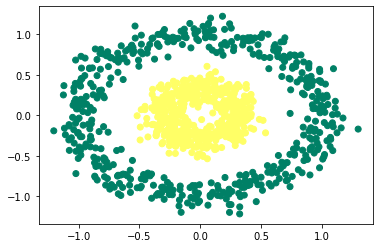

In [10]:
# affichage des échantillons X
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

### Entrainement du réseau de neurones

100%|██████████| 50/50 [00:00<00:00, 507.04it/s]


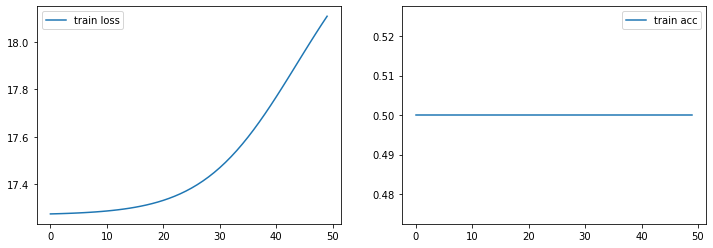

In [11]:
parametres = reseau_2couches(Xt, y, n1 = 32, n_iter = 50, learning_rate = 0.02)

### Predictions

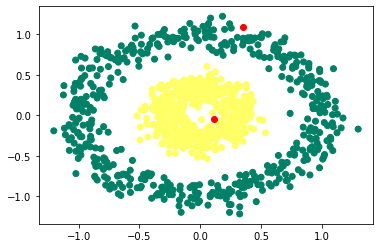

Predictions : [[ True  True  True  True  True]]
Vraies Vals : [[1 0 0 1 1]]


In [12]:
# Prediction sur de nouvelles données
X_valid, y_valid = make_circles(n_samples=5, factor=0.3, noise=0.05, random_state=0)
X_valid = X_valid.T
y_valid = y_valid.reshape(1, y_valid.shape[0])

# affichage des échantillons X et de la nouvelle donnée
plt.figure()
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(X_valid[:,0], X_valid[:,1], c='r')
# affichage courbe de décision
plt.show()

# Prediction sur nouvel échantillon
print("Predictions : " + str(predict(X_valid, parametres)))
print("Vraies Vals : " + str(y_valid))

## Essai 2

### Chargement des données / images

In [13]:
import h5py
def load_data():
    train_dataset = h5py.File('trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data()

### Affichage des premières images

dimensions de X: (1000, 64, 64)
dimensions de y: (1000, 1)
1000


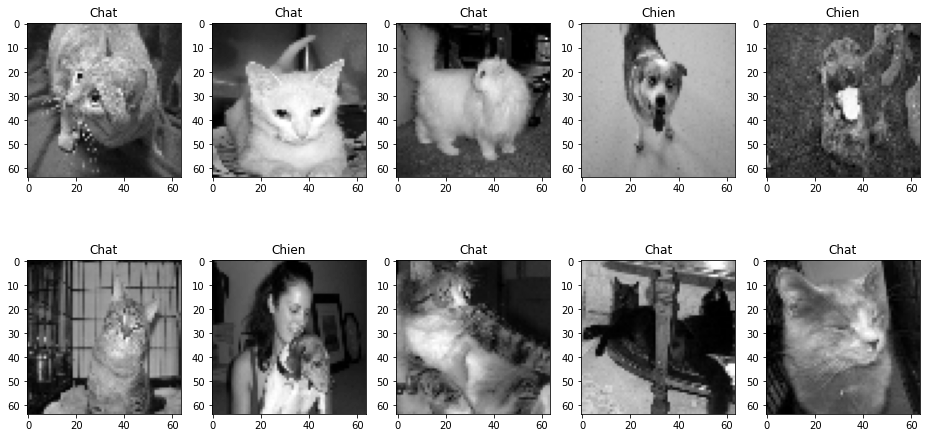

In [14]:
print('dimensions de X:', X_train.shape)
print('dimensions de y:', y_train.shape)
print(len(X_train))

# Affichage des premières images
plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    if y_train[i] == 1:
        plt.title('Chien')
    else:
        plt.title('Chat')
plt.show()

### Préparation des données

In [15]:
max_train = X_train.max()
X_train = X_train / max_train
X_test = X_test / max_train     # Attention l'entrainement est fait avec le max de X_train
# 2 - passage de 64x64 à 4096*1
X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

# Premier entrainement
X_train_reshape = X_train_reshape.T
y_train = y_train.T

print('shape = '+str(X_train_reshape.shape))

shape = (4096, 1000)


### Entrainement du modèle

100%|██████████| 1000/1000 [00:08<00:00, 118.34it/s]


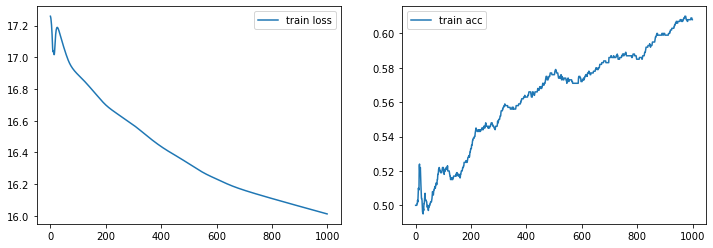

In [16]:
parametres = reseau_2couches(X_train_reshape, y_train, n1 = 32, learning_rate = 0.05, n_iter = 1000, pas_iter = 10)